# Rankings

In this notebook, we explore the rankings dataset.

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from load_datasets import load_rankings

dataset = load_rankings(path='../data/raw/rankings.csv')

In [3]:
display(dataset)

3                                       ... 43922              \
              DTC                                  KNC  ...    LR               
             full        model          no        full  ... model  no           
              ACC AUC F1   ACC AUC  F1 ACC AUC F1  ACC  ...    F1 ACC AUC  F1   
encoder                                                 ...                     
BE              1   1  1    12  12  12   1   1  1   21  ...     7   8   8   6   
BUCV10RGLMME    1   1  1    14  14  13   1   1  1   16  ...    12  10  10  10   
BUCV10TE        1   1  1     0   0   0   1   1  1    9  ...    11   9   9   9   
BUCV2RGLMME     1   1  1    18  18  18   1   1  1   15  ...    18  14  14  14   
BUCV2TE         1   1  1     6   6   6   1   1  1    8  ...    15  13  13  13   
BUCV5RGLMME     1   1  1    16  17  16   1   1  1   14  ...    14  12  12  11   
BUCV5TE         1   1  1     4   4   4   1   1  1    7  ...    13  11  11  12   
CBE             3   3  4    25  24  25   4   3  4   27  ...     4   5   5   5   
CE              1   1  1     8   8   8   1   1  1   26  ...     5   2   2   4   
CV10RGLMME      1   1  1    15  16  15   1   1  1   18  ...    21  22  23  24   
CV10TE          1   1  1    13  13  14   1   1  1   12  ...    17  21  21  21   
CV2RGLMME       1   1  1    21  21  21   1   1  1   11  ...    23  24  24  23   
CV2TE           1   1  1    22  22  22   1   1  1    2  ...    27  20  20  20   
CV5RGLMME       0   0  0    20  20  20   0   0  0   19  ...    20  19  19  19   
CV5TE           0   0  0    10  10  10   0   0  0    5  ...    26  18  18  18   
DE              4   4  3    24  25  24   3   4  3   28  ...    31  30  30  30   
DTEM10          1   1  1     3   3   3   1   1  1   13  ...     9  16  16  16   
DTEM2           1   1  1    17  15  17   1   1  1    1  ...     3   6   6   7   
DTEM5           1   1  1     3   3   3   1   1  1   10  ...    10  15  15  15   
ME01E           1   1  1     3   3   3   1   1  1    6  ...    19  23  22  22   
ME10E           1   1  1     3   3   3   1   1  1    4  ...    28  27  27  27   
ME1E            1   1  1     3   3   3   1   1  1    6  ...    25  26  26  26   
MHE             1   1  1     2   2   2   1   1  1   24  ...     1   1   1   2   
OE              1   1  1     9   9   9   1   1  1   23  ...     8   7   7   8   
OHE             1   1  1     5   5   5   1   1  1   22  ...     2   4   4   3   
PBTE0001        1   1  1     7   7   7   1   1  1    9  ...    22  17  17  17   
PBTE001         1   1  1    11  11  11   1   1  1    3  ...    29  28  28  28   
PBTE01          2   2  2    23  23  23   2   2  2   20  ...    30  29  29  29   
RGLMME          1   1  1    19  19  19   1   1  1   17  ...    24  25  25  25   
SE              1   1  1     1   1   1   1   1  1   25  ...     6   3   3   1   
TE              1   1  1     3   3   3   1   1  1    9  ...    16  23  22  22   
WOEE            1   1  1     3   3   3   1   1  1    0  ...     0   0   0   0   

                                       
              SVC                      
             full          no          
              ACC AUC  F1 ACC AUC  F1  
encoder                                
BE              0   0   4   4   4   4  
BUCV10RGLMME   14  14  10  21  21  21  
BUCV10TE       14  14  10  12  12  12  
BUCV2RGLMME    19  19  19   7   7   8  
BUCV2TE        21  21  21   8   8   7  
BUCV5RGLMME    13  13   9  14  15  15  
BUCV5TE        13  13   9   9   9   9  
CBE             2   2   0   1   1   0  
CE             25  24  24   0   0   2  
CV10RGLMME     20  20  20  23  23  23  
CV10TE         22  22  22  16  16  16  
CV2RGLMME      17  17  17  22  22  22  
CV2TE          22  22  22  16  16  16  
CV5RGLMME      23  23  23  13  13  13  
CV5TE          15  15  15  13  13  13  
DE             24  25  25  26  26  26  
DTEM10          6   5   3  19  19  19  
DTEM2           4   3   1  15  14  14  
DTEM5           5   4   2  19  19  19  
ME01E          15  15  15  18  18  18  
ME10E          10 

The dataset displays the rankings of different encoders regarding a fixed dataset, model, tuning and metric. We have 32 different encoders and 1548 different evaluation combinations.

## 1) Examined Combinations

Let us first look at which combinations have been examined. These can be seen in the column, which has the form of a multi-dimensional index.

In [4]:
dataset.columns

MultiIndex([(    '3', 'DTC',  'full', 'ACC'),
            (    '3', 'DTC',  'full', 'AUC'),
            (    '3', 'DTC',  'full',  'F1'),
            (    '3', 'DTC', 'model', 'ACC'),
            (    '3', 'DTC', 'model', 'AUC'),
            (    '3', 'DTC', 'model',  'F1'),
            (    '3', 'DTC',    'no', 'ACC'),
            (    '3', 'DTC',    'no', 'AUC'),
            (    '3', 'DTC',    'no',  'F1'),
            (    '3', 'KNC',  'full', 'ACC'),
            ...
            ('43922',  'LR', 'model',  'F1'),
            ('43922',  'LR',    'no', 'ACC'),
            ('43922',  'LR',    'no', 'AUC'),
            ('43922',  'LR',    'no',  'F1'),
            ('43922', 'SVC',  'full', 'ACC'),
            ('43922', 'SVC',  'full', 'AUC'),
            ('43922', 'SVC',  'full',  'F1'),
            ('43922', 'SVC',    'no', 'ACC'),
            ('43922', 'SVC',    'no', 'AUC'),
            ('43922', 'SVC',    'no',  'F1')],
           name=('dataset', 'model', 'tuning', 'scoring'), leng

We have multidimensional columns consisting of entries for "dataset", "model", "tuning" and "scoring". Every column is therefore a permutation of these categories. Let us examine what kind of values occur and how frequent these are.

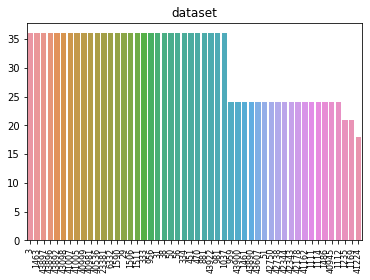

number of unique values: 50
values: ['3', '1463', '43897', '43896', '43892', '43098', '41007', '41005', '40999', '40981', '40536', '23381', '6332', '1590', '29', '1506', '1511', '333', '956', '31', '38', '50', '56', '334', '451', '470', '881', '43922', '981', '1037', '959', '43900', '1461', '43890', '43607', '51', '42750', '42738', '42344', '42343', '42178', '41162', '1111', '1114', '1486', '40945', '1112', '1235', '1169', '41224']


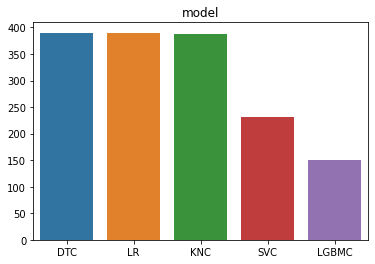

number of unique values: 5
values: ['DTC', 'LR', 'KNC', 'SVC', 'LGBMC']


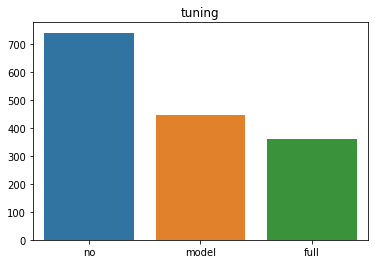

number of unique values: 3
values: ['no', 'model', 'full']


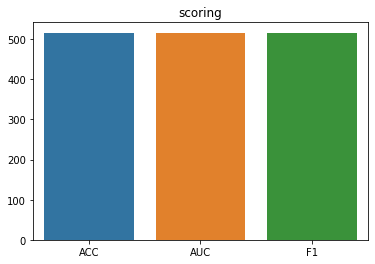

number of unique values: 3
values: ['ACC', 'AUC', 'F1']


In [5]:
for level, name in enumerate(dataset.columns.name):
    value_counts = dataset.columns.get_level_values(level).value_counts()
    values = value_counts.index
    sns.barplot(x=values, y=value_counts)
    plt.title(name)
    if len(value_counts) > 20:
        plt.xticks(fontsize=8, rotation=90)
    plt.show()
    print('number of unique values:', len(values))
    print('values:', values.to_list())

We observe that except for metrics, the categories are not evenly distributed. Among other things, this implies that not every possible combination of dataset, model, tuning and metric was evaluated. To be more precise, the total possible number of unique combinations is 50x5x3x3=2250, while the actual number of combinations is 1548.

## 2) Failed Encoder Evaluations

Let us examine whether there are missing values in the rankings. A missing value ("nan") implies that the encoder evaluation failed and a ranking could not be determined. First, we check what values there are in the dataset.

In [6]:
unique_values = list(np.unique(dataset.values))
print('count:', len(unique_values))
print(unique_values)

count: 33
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, nan]


In total, we have 33 unique value. Without "nan" this would be 32, which corresponds to the number of unique encoders. Let us examine the missing values further.

In [7]:
nan_count = dataset.isna().sum().sum()
not_nan_count = dataset.notna().sum().sum()
total_count = nan_count + not_nan_count

counts = pd.DataFrame([
    [total_count, '{:.2%}'.format(total_count / total_count)], 
    [nan_count, '{:.2%}'.format(nan_count / total_count)]
], columns=['abs.', 'rel.'], index=['total', 'nan'])

display(counts)

,abs.,rel.
total,49536,100.00%
nan,1490,3.01%


3% of the dataset are missing values. This means that 3% of encoder rankings failed. Let us examine, if we can find patterns. 

### 2.1) Encoders
First, we check how many failures there were for each encoder separately.

,encoder,abs.,rel.
29,SE,175,11.30%
22,MHE,165,10.66%
24,OHE,130,8.40%
25,PBTE0001,123,7.95%
1,BUCV10RGLMME,88,5.68%
5,BUCV5RGLMME,82,5.30%
9,CV10RGLMME,71,4.59%
13,CV5RGLMME,62,4.01%
3,BUCV2RGLMME,60,3.88%
28,RGLMME,57,3.68%


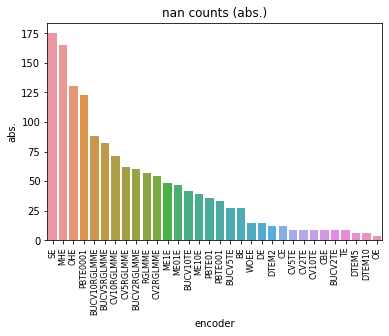

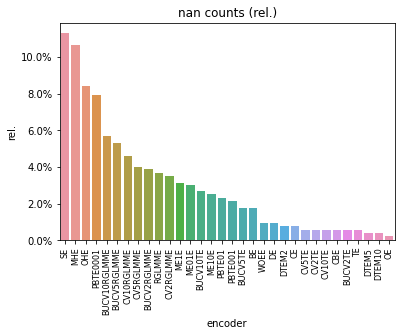

In [8]:
nan_count = dataset.transpose().isna().sum()
not_nan_count = dataset.transpose().notna().sum()

counts = pd.DataFrame({
    'abs.': nan_count,
    'rel.': (nan_count / (nan_count + not_nan_count))
}).reset_index()
counts = counts.sort_values(by='abs.', ascending=False)

display_counts = counts.copy()
display_counts['rel.'] = display_counts['rel.'].apply(lambda x: '{:.2%}'.format(x))
display(display_counts)

sns.barplot(x=counts['encoder'], y=counts['abs.'])
plt.title('nan counts (abs.)')
plt.xticks(fontsize=8, rotation=90)
plt.show()

sns.barplot(x=counts['encoder'], y=counts['rel.'])
plt.title('nan counts (rel.)')
plt.xticks(fontsize=8, rotation=90)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.show()

We see that there is a big variation between the encoders. While OE (OrdinalEncoder) almost never failed 4 times (0.26%), SE (SumEncoder) failed relatively often with 175 times (11.30%).

### 2.2) Combinations

Now, let us check how many failures resulted regarding different uses of dataset, model, tuning and scoring.

In [44]:
dataset_missing = dataset.isna()
dataset_not_missing = dataset.notna()

def display_combinations(name):
    level = dataset_missing.columns.name.index(name)
    
    nan_count = dataset_missing.groupby(dataset_missing.columns.get_level_values(level), axis=1).sum().sum()
    not_nan_count = dataset_not_missing.groupby(dataset_not_missing.columns.get_level_values(level), axis=1).sum().sum()
    
    counts = pd.DataFrame({
        name: nan_count.index,
        'abs.': nan_count,
        'rel.': (nan_count / (nan_count + not_nan_count))
    })
    counts = counts.sort_values(by='rel.', ascending=False)
    counts = counts.reset_index(drop=True)
    
    display_counts = counts.copy()
    display_counts['rel.'] = display_counts['rel.'].apply(lambda x: '{:.2%}'.format(x))
    display(display_counts)
    
    sns.barplot(x=counts[name], y=counts['rel.'])
    plt.title('nan counts (rel.)')
    plt.xticks(fontsize=8, rotation=90)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
    plt.show()

,dataset,abs.,rel.
0,42343,198,25.78%
1,40945,192,25.00%
2,959,169,22.01%
3,42344,166,21.61%
4,42750,159,20.70%
5,41224,98,17.01%
6,43890,97,12.63%
7,1235,57,8.48%
8,1112,64,8.33%
9,1114,63,8.20%


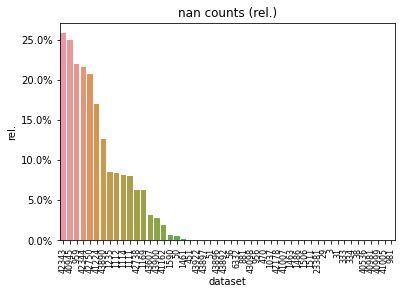

In [45]:
display_combinations('dataset')

The majority of datasets resulted in no issues for the encoder evaluation. There are some datasets, where a large portion of evaluations failed, such as 42343 (25.78%) and 40945 (25.00%).

,model,abs.,rel.
0,SVC,329,4.45%
1,KNC,474,3.83%
2,LGBMC,129,2.69%
3,DTC,318,2.55%
4,LR,240,1.92%


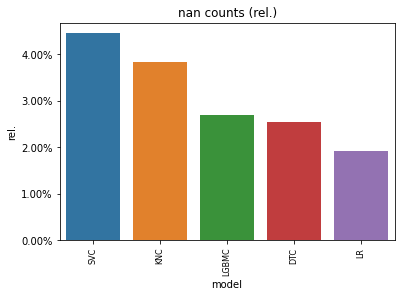

In [46]:
display_combinations('model')

For all different models, we find a small, but significant number of evaluation errors. The most occur for SVC (SupportVectorClassifier) with 4.45% and the least for LR (LinearRegression) with 1.92%.

,tuning,abs.,rel.
0,model,627,4.38%
1,no,855,3.61%
2,full,8,0.07%


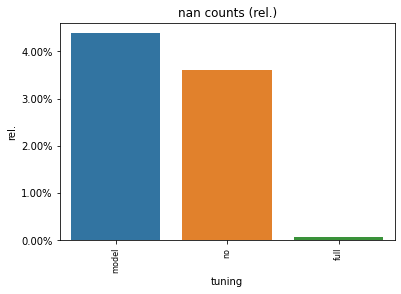

In [47]:
display_combinations('tuning')

Regarding tuning, full tuning results in almost no evaluation errors with only 0.07%. Only tuning the model results in 3.61% of evaluations failing and no tuning at all results in 3.61% failing.

,scoring,abs.,rel.
0,F1,500,3.03%
1,AUC,496,3.00%
2,ACC,494,2.99%


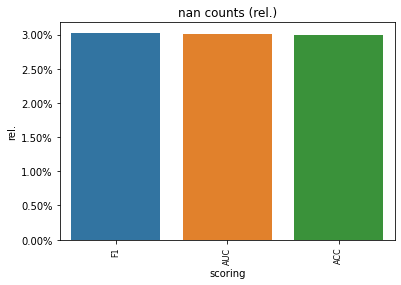

In [43]:
display_combinations('scoring')

Regarding different scoring metrics, the errors are distributed almost evenly. The scoring methods seem to have nearly no effect on whether the evaluation failed or not.